# Pitching Analysis Script

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pand
import plotly.graph_objects as go

In [8]:
df = pand.read_excel('Live_Feb5.xlsx', usecols="D:W", skiprows=4)
df

,Pitch Type,Is Strike,Strike Zone Side,Strike Zone Height,Velocity,Total Spin,True Spin (release),Spin Efficiency (release),Spin Direction,Spin Confidence,VB (trajectory),HB (trajectory),VB (spin),HB (spin),Horizontal Angle,Release Angle,Release Height,Release Side,Release Extension (ft),Gyro Degree (deg)
0,ChangeUp,N,-14.50,30.24,78.18,1620.0,1422.1,87.8,02:34:00,0.8,4.20,13.19,4.2,17.0,-4.54,0.83,4.27,1.84,2.063900,-28.62
1,ChangeUp,N,-18.45,31.97,78.79,1793.2,1788.8,99.8,02:36:00,0.9,4.70,21.73,4.7,21.0,-5.67,1.36,4.21,1.96,1.663172,-3.97
2,ChangeUp,N,4.23,17.42,76.68,1812.5,1747.1,96.4,02:54:00,0.8,1.05,23.46,1.1,20.3,-3.85,0.15,4.17,1.91,2.048166,-15.44
3,CurveBall,Y,-6.70,19.28,76.55,2187.3,743.3,34.0,07:48:00,0.9,-4.55,-4.94,-4.6,-7.8,-2.07,1.11,4.49,1.80,1.554743,70.13
4,CurveBall,N,2.40,12.92,75.43,1982.0,783.9,39.6,07:30:00,0.8,-5.89,-0.57,-5.9,-7.3,-1.56,0.55,4.62,1.68,1.951225,66.70
5,CurveBall,N,18.36,45.35,71.70,1890.5,818.3,43.3,10:20:00,0.7,6.86,0.24,6.9,-8.3,-0.41,3.11,4.62,1.89,1.829487,64.35
6,CurveBall,Y,-8.22,19.73,74.47,2048.9,696.8,34.0,07:48:00,0.9,-4.43,-1.57,-4.4,-7.4,-2.49,1.64,4.59,1.73,2.005039,70.12
7,CurveBall,N,4.62,17.28,72.50,1914.3,857.0,44.8,07:42:00,0.8,-5.96,-1.26,-6.0,-8.9,-1.29,1.77,4.51,1.67,1.965590,63.40
8,CurveBall,Y,-7.21,22.71,73.13,2200.6,948.4,43.1,07:40:00,0.8,-6.34,-2.15,-6.3,-9.1,-2.28,1.92,4.51,1.68,1.918537,64.47
9,Fastball,Y,-9.29,34.14,86.43,2100.8,2050.2,97.6,02:00:00,0.9,10.21,20.52,10.2,17.8,-4.75,0.15,4.46,1.86,2.047445,12.60


# Pitch Usage Data

In [38]:
def usage(pitch_type, dataframe):
    num_pitches = dataframe[dataframe['Pitch Type'] == pitch_type].size
    return num_pitches

In [39]:
def usage_per(pitch_type, dataframe):
    total_usage = usage(pitch_type, dataframe)
    usage_per = total_usage/dataframe.size
    return usage_per

In [19]:
def plot_pitches(dataframe, title):
    groups = dataframe.groupby('Pitch Type')
    
    for name, group in groups:
        x = group['Strike Zone Side']
        y = group['Strike Zone Height']
        locs = pand.DataFrame([x,y])
        plt.scatter(x, y, label=name)
        #heatmap = sn.heatmap(data = locs)

    rect = patches.Rectangle((-10,25), 20, 30, fill=False, color="red")
    plt.gca().add_patch(rect)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show()

# Velocity Data

In [22]:
def velo_pt(dataframe):

    d = {'Velocity' : dataframe.loc[:,"Velocity"], 'Pitch Type' : dataframe.loc[:,"Pitch Type"]}
    
    frame = pand.DataFrame(data = d)
    
    frame.head()
    
    frame.boxplot(column='Velocity', by='Pitch Type')
        

# Pitch charts for all pitches in 2022 season by pitch type

# Strike % by Pitch Type

In [25]:
def strike_percentage(type, df):
    all_type = df[df['Pitch Type'] == type]
    all_strikes = all_type[all_type['Is Strike'] == 'Y']
    if not all_type.empty:
        strike_percent = all_strikes.size/all_type.size
    else:
        strike_percent = None
    return strike_percent

In [ ]:
def total_usage(df):
    groups = df.groupby('Pitch Type')
    

# Pitch charts for all pitches in 2022 season by count

In [43]:
def total_usage(df):
    pitch_usage = np.array([usage('FB', df), usage('CH', df), usage('SL', df), usage('CV', df), usage('SP', df), usage('CT', df)])

    plt.pie(pitch_usage, labels=['FB', 'CH','SL', 'CV', 'SP', 'CT'], autopct='%1.1f%%')
    plt.title("Pitch Usage %")
    plt.show()

In [27]:
def plot_all_types(df):
    plot_pitches(df, "All Pitch Types")
    groups = df.groupby('Pitch Type')
    
    colorscale = [[0,'light blue'], [1,'red']]

    
    for name, group in groups:
        x = group['Strike Zone Side']
        y = group['Strike Zone Height']
        z = group.count()
        
        fig = go.Figure(data = go.Contour(z = z, x = x, y = y, contours_coloring='heatmap', colorscale=colorscale))
        fig.update_layout({"height":540,"width":540})
        fig.show()
        
        #plt.scatter(x, y, label=name)


# Figures

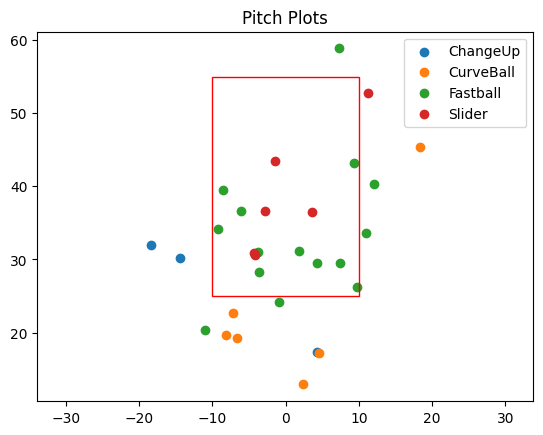

In [21]:
plot_pitches(df, 'Pitch Plots')

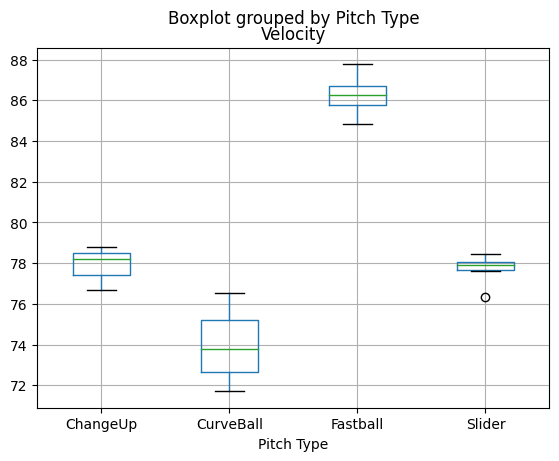

In [24]:
velo_pt(df)

# MLB Comps

In [59]:
mlb_pitchers_2021 = pand.read_excel('mlb_pitchers_2021.xlsx', usecols="A:J")

window = 2.5

In [60]:
def sim_fb_usage(dataframe, window):
    fb_usage = (usage('FB', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['fastball'].between(fb_usage-window, fb_usage+window)]
    return sim_mlb

In [61]:
def sim_ch_usage(dataframe, window):
    ch_usage = (usage('CH', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['changeup'].between(ch_usage-window, ch_usage+window)]
    return sim_mlb

In [62]:
def sim_sl_usage(dataframe, window):
    sl_usage = (usage('SL', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['slider'].between(sl_usage-window, sl_usage+window)]
    return sim_mlb

## MLB Pitchers With Similar Pitch Usage Profiles

In [63]:
def construct_savant_url(dataframe):
    for index, row in dataframe.iterrows():
        print("Baseball Savant URL for {:s} {:s}: ".format(row['first'], row['last']))
        first_name = row['first'].lower().strip()
        last_name = row['last'].lower().strip()
        id = str(row['pitcher'])
        url = 'https://baseballsavant.mlb.com/savant-player/' + first_name +'-' + last_name + '-' + id + '?stats=statcast-r-pitching-mlb'
        print(url)


In [64]:
mlb_comps= sim_fb_usage(df, window).merge(sim_ch_usage(df, window), on='pitcher', how='inner').merge(sim_sl_usage(df, window), on='pitcher', how='inner', sort=True)
mlb_comps = mlb_comps[['last', 'first','pitcher', 'fastball', 'slider', 'changeup', 'curve', 'splitter']]
print("Our pitcher's usage profile: FB: {: 0.2f}%, SL: {: 0.2f}%, CH: {: 0.2f}%\nComparable Pitchers in MLB:".format(usage('FB', df)/df.size*100, usage('SL', df)/df.size*100, usage('CH', df)/df.size*100))
print(mlb_comps)
print()
construct_savant_url(mlb_comps)

Our pitcher's usage profile: FB:  58.62%, SL:  13.79%, CH:  5.17%
Comparable Pitchers in MLB:
Empty DataFrame
Columns: [last, first, pitcher, fastball, slider, changeup, curve, splitter]
Index: []



## Identifying High-Performing Pitchers with Similar Arsenals 

In [65]:
pitchers_stats_2021 = pand.read_excel('expected_stats_2021.xlsx', usecols="A:G")

In [66]:
#Filter out pitchers with different arsenals
sim_arsenals = mlb_pitchers_2021[(mlb_pitchers_2021['fastball'] > 20) & (mlb_pitchers_2021['changeup'] > 10) & (mlb_pitchers_2021['slider'] > 20) & (mlb_pitchers_2021['curve'] < 5)]
sim_arsenals = pitchers_stats_2021.merge(sim_arsenals, on='pitcher')
sim_arsenals = sim_arsenals.sort_values('estwoba')
print(sim_arsenals)

        last_x   first_x  pitcher  estba  estslg  estwoba  xera      last_y  \
0     Iglesias    Raisel   628452  0.190   0.331    0.243  2.45    Iglesias   
1       Tepera      Ryan   572193  0.171   0.280    0.249  2.58      Tepera   
2       RodÃ³n    Carlos   607074  0.189   0.314    0.254  2.68      RodÃ³n   
3          May    Trevor   543507  0.192   0.349    0.264  2.90         May   
4      Giolito     Lucas   608337  0.221   0.362    0.280  3.27     Giolito   
5      GarcÃ­a   JarlÃ­n   606424  0.222   0.367    0.281  3.30     GarcÃ­a   
6       Watson      Tony   453265  0.223   0.359    0.283  3.35      Watson   
7    Boxberger      Brad   502202  0.203   0.348    0.286  3.42   Boxberger   
8    Alcantara     Sandy   645261  0.232   0.369    0.288  3.47   Alcantara   
9       Alcala     Jorge   660896  0.226   0.404    0.293  3.60      Alcala   
10       Wells     Tyler   669330  0.222   0.418    0.293  3.60       Wells   
11       Cessa      Luis   570666  0.251   0.374    

In [67]:
# Take top 10 guys from list
sim_arsenals = sim_arsenals[['last_x', 'first_x', 'pitcher', 'fastball', 'sinker', 'cutter', 'slider', 'changeup', 'curve', 'splitter', 'estba', 'estslg', 'estwoba', 'xera']]
top_10 = sim_arsenals.head(10)
print("Top 10 MLB Performers by wOBA With Similar Pitch Mixes\n")
print(top_10)
for index, row in top_10.iterrows():
    print()
    print("Baseball Savant URL for {:s} {:s}: ".format(row['first_x'], row['last_x']))
    first_name = row['first_x'].lower().strip()
    last_name = row['last_x'].lower().strip()
    id = str(row['pitcher'])
    url = 'https://baseballsavant.mlb.com/savant-player/' + first_name +'-' + last_name + '-' + id + '?stats=statcast-r-zones-mlb'
    print(url)

Top 10 MLB Performers by wOBA With Similar Pitch Mixes

      last_x   first_x  pitcher  fastball  sinker  cutter  slider  changeup  \
0   Iglesias    Raisel   628452      34.9     9.6     0.0    30.8      24.6   
1     Tepera      Ryan   572193      33.2    10.9     0.0    44.9      10.4   
2     RodÃ³n    Carlos   607074      58.7     0.0     0.0    27.2      12.4   
3        May    Trevor   543507      60.3     0.0     0.0    24.5      15.2   
4    Giolito     Lucas   608337      43.9     0.0     0.0    21.5      31.8   
5    GarcÃ­a   JarlÃ­n   606424      50.0     0.0     0.0    25.4      24.6   
6     Watson      Tony   453265      25.2    17.4     0.0    24.1      33.3   
7  Boxberger      Brad   502202      55.9     0.0     0.0    23.9      20.2   
8  Alcantara     Sandy   645261      21.6    28.2     0.0    24.1      23.5   
9     Alcala     Jorge   660896      37.3     6.0     0.0    40.7      16.0   

   curve  splitter  estba  estslg  estwoba  xera  
0    0.0       0.0  0.1